In [1]:
#! pip install climetlab --quiet
#! pip install climetlab_s2s_ai_competition --quiet

In [2]:
import climetlab as cml 

/home/mafp/.conda/envs/dev8/lib/python3.8/site-packages/ecmwflibs.libs/libMagPlus-a390b2dc.so


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.3.18
Climetlab-s2s-ai-competition plugin version : 0.3.6


# Using Netcdf data

## Version 0.1.20 : with coordinates (forecast_time,step) + time as another variable.

In [4]:
version = '0.1.36'

Let us download netcdf file for total precipitation (tp) for one date :

In [5]:
cmlds = cml.load_dataset("s2s-ai-competition-training-set-ecmwf",
                         date=["20200102"],
                         parameter='tp',
                         version=version,
                         format='netcdf')

By downloading data from this dataset, you agree to the terms and conditions defined at   https://apps.ecmwf.int/datasets/data/s2s/licence/ If you do not agree with such terms, do not download the data. 


This climetlab dataset can be used as a xarray.Dataset or as a pandas.DataFrame :

In [6]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [7]:
cmlds.to_xarray().to_dataframe() # TODO : implement to_pandas() ?

time         tp
forecast_time latitude longitude realization step                         
2020-01-02     90.0    0.0       0           0 days  2020-01-02   0.000000
                                             1 days  2020-01-03   0.050476
                                             2 days  2020-01-04   0.529724
                                             3 days  2020-01-05   0.983826
                                             4 days  2020-01-06   1.488342
...                                                         ...        ...
              -90.0    358.5     50          42 days 2020-02-13  11.477844
                                             43 days 2020-02-14  11.503052
                                             44 days 2020-02-15  11.528320
                                             45 days 2020-02-16  11.528320
                                             46 days 2020-02-17  11.528320

[69608880 rows x 2 columns]

We can get the temperature parameter (2t) in a similar fashion. The "date" and "parameter" arguments also accept lists of values.

In [8]:
cml.load_dataset("s2s-ai-competition-training-set-ecmwf",
                 date="20200102",
                 parameter='2t',
                 version=version,
                 format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 46)
Coordinates:
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * step           (step) timedelta64[ns] 1 days 2 days ... 45 days 46 days
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] ...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...

In [9]:
import numpy as np
dates = [np.datetime64('2020-01-02'),'2020-01-09','20200116']
cml.load_dataset("s2s-ai-competition-training-set-ecmwf",
                 date=dates,
                 parameter=['2t','tp'],
                 version=version,
                 format='netcdf').to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 3, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 ... 2020-01-16
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2020-01-02 ... 2020-0...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

In [38]:
# TODO
#import pandas as pd
#cml.load_dataset("s2s-ai-competition-reference-set", date=pd.date_range(start="2020-01-02", end="2020-01-31", freq="w-thu"), parameter='2t', version=version, format='netcdf').to_xarray()

Hindcast data is available by adding the appropriate parameter : hindcast = True

In [39]:
ds = cml.load_dataset("s2s-ai-competition-training-set-ecmwf",,
                      hindcast=True,
                      date="20200102",
                      parameter=['2t','tp'],
                      version=version,
                      format='netcdf').to_xarray()

In [12]:
ds

<xarray.Dataset>
Dimensions:        (forecast_time: 20, latitude: 121, longitude: 240, realization: 11, step: 47)
Coordinates:
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
Data variables:
    time           (forecast_time, step) datetime64[ns] 2000-01-02 ... 2019-0...
    t2m            (realization, forecast_time, step, latitude, longitude) float32 ...
    tp             (realization, forecast_time, step, latitude, longitude) float32 ...

### Computing average and plotting

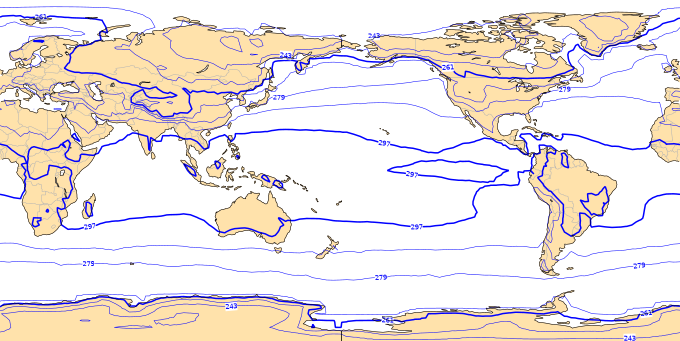

In [13]:
mean1 = ds.mean(dim="step")
cml.plot_map(mean1.isel(forecast_time=0, realization=0))

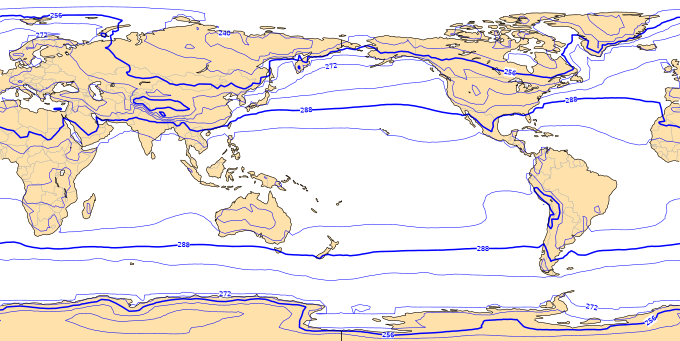

In [14]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(step=20, realization=0))


In [15]:
#mean3 = ds.mean(dim="time")
#cml.plot_map(mean3.isel(forecast_time=20, realization=0))